In [17]:
# import libraries
import pandas as pd
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time 

# classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# other libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline, imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')



In [18]:
df = pd.read_csv('creditcard.csv', on_bad_lines= 'skip')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
df.isnull().sum().max()

0

In [24]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [30]:
print("No frauds",round(df['Class'].value_counts()[0]/len(df)*100,2),"% of the dataset")
print("Frauds",round(df['Class'].value_counts()[1]/len(df)*100,2),"% of the dataset")

No frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Note: 
"""Here we noticed, how data is imbalance. Most of transactions are non-fraud. If we use the data frame as base for our predictive models and analysis we might get a lot of errors and our algorithms will probably over fit since it will 'assume' most transactions are fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud."""

[]

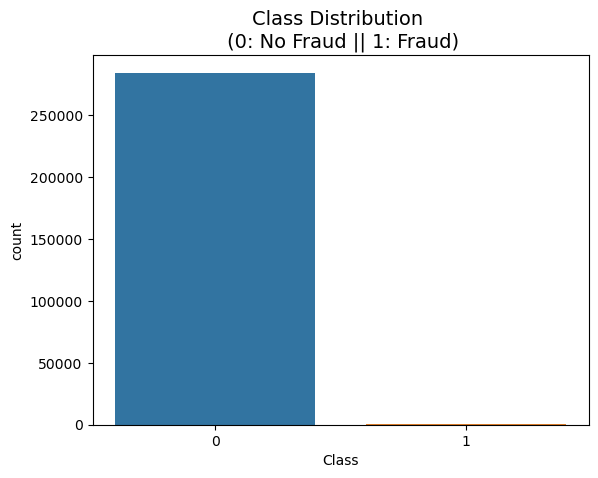

In [36]:
# plot the graph

sns.countplot(data=df,x= 'Class')
plt.title("Class Distribution \n (0: No Fraud || 1: Fraud)", fontsize =14)
plt.plot()

In [ ]:
Distributions: 
By seeing the distribution we can have an idea how skewed are these features, we can also ee future distributions of the other 
features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future

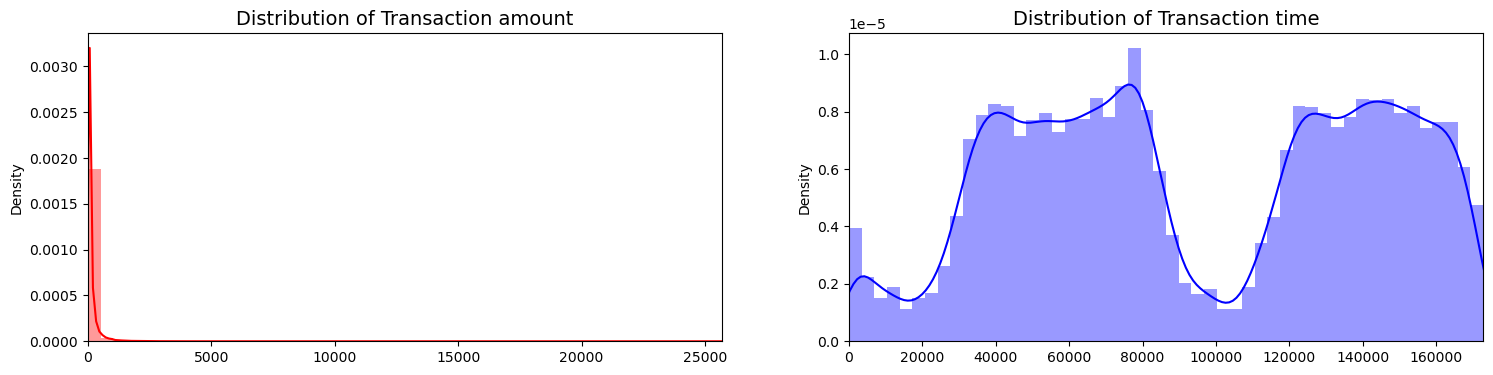

In [47]:
# plot sub-plots

fig, ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# plot 
sns.distplot(amount_val,ax  =ax[0], color = 'r')
ax[0].set_title("Distribution of Transaction amount", fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])


# plot 
sns.distplot(time_val,ax  =ax[1], color = 'b')
ax[1].set_title("Distribution of Transaction time", fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [50]:
"""
Steps 
1. scale Time and Amount
2. Sub sample of data have equal amount of fraud and Non fraud cases

Sub samples

Create Sub samples :
A. Overfitting
B. Wrong correlations
"""

array([<Axes: title={'center': 'Distribution of Transaction amount'}, ylabel='Density'>,
       <Axes: title={'center': 'Distribution of Transaction time'}, ylabel='Density'>],
      dtype=object)

In [52]:
# Since most of our data is scaled we should scale the columns that are left to scale (Amount and Time)

# Robust is less prone to outliers
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler =StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis= 1,inplace=True)

In [53]:
scaled_amt = df['scaled_amount']
scaled_time = df['scaled_time']


df.drop(['scaled_amount','scaled_time'], axis= 1,inplace= True)
df.insert(0,'scaled_amount',scaled_amt)
df.insert(1,'scaled_time', scaled_time)

df.head(10)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.256131,-0.994960,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.237686,-0.994937,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,0.262698,-0.994901,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,0.994900,-0.994901,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.255991,-0.994878,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [73]:
df.shape

(284807, 31)

In [61]:
# Splitting the data (Original data frame)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print("No Fraud",round(df['Class'].value_counts()[0]/ len(df)*100,2),"% of the dataset")
print("Fraud",round(df['Class'].value_counts()[1]/ len(df)*100,2),"% of the dataset")



X= df.drop('Class',axis=1)
y = df['Class']



No Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset


In [63]:
sss= StratifiedKFold(10,random_state= None, shuffle = False)

In [78]:
for train_index , test_index in sss.split(X,y):
    print("Train: ", train_index, "Test:",test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index],X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index],y.iloc[test_index]


# Check the distribution of labels

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
origianal_ytrain = original_ytrain.values
original_ytest = original_ytest.values
    

Train:  [ 11710  11841  11880 ... 284804 284805 284806] Test: [    0     1     2 ... 28522 28523 28524]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [11710 11841 11880 ... 57018 57019 57020]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [30442 30473 30496 ... 85497 85498 85499]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [ 48094  50211  50537 ... 113966 113967 113968]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [ 80760  81186  81609 ... 142427 142428 142429]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [119714 119781 120505 ... 170948 170949 170950]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [150647 150654 150660 ... 199403 199404 199405]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [154697 154718 154719 ... 227867 227868 227869]
Train:  [     0      1      2 ... 284804 284805 284806] Test: [212516 212644 213092 ... 256351 256352 256353]
Train:  [     0      1      

In [76]:
X.iloc[2]

scaled_amount    4.983721
scaled_time     -0.994972
V1              -1.358354
V2              -1.340163
V3               1.773209
V4               0.379780
V5              -0.503198
V6               1.800499
V7               0.791461
V8               0.247676
V9              -1.514654
V10              0.207643
V11              0.624501
V12              0.066084
V13              0.717293
V14             -0.165946
V15              2.345865
V16             -2.890083
V17              1.109969
V18             -0.121359
V19             -2.261857
V20              0.524980
V21              0.247998
V22              0.771679
V23              0.909412
V24             -0.689281
V25             -0.327642
V26             -0.139097
V27             -0.055353
V28             -0.059752
Name: 2, dtype: float64

In [ ]:
# random sampling

"""
In this phase of the project we will implement "Random Under Sampling" which basically consist of removing data in order to have a more balanced dataset and thus avoiding our models to overfit

Steps:
1. The first thing we have to do os determine how imbalanced is our class on the class column to determine the count for each label
2. Once we determine how many instance are considered fraud transactions , we should bring non fraud transaction to the same amount as fraud transaction
3. After implementing this technique, we have a sub sample of out data frame with a 50/50 ration with regards to our classes

"""

In [ ]:
# Since our class is highly skewed we shou;ld make them equivalent in order to have a normal distribution of the classes

# Lets shuffle the data before creating the subsample
df = df.sample(frac= 1)

In [80]:
fraud_df = df.loc[df['Class']==1]
Non_fraud_df = df.loc[df['Class']==0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, Non_fraud_df])

# shuffle data frame 

new_df = normal_distributed_df.sample(frac=1, random_state= 42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.994079,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.993104,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


In [81]:
print("distribution of classes are as of the dataset:")
print(new_df['Class'].value_counts()/len(new_df))

distribution of classes are as of the dataset:
0    0.5
1    0.5
Name: Class, dtype: float64


[]

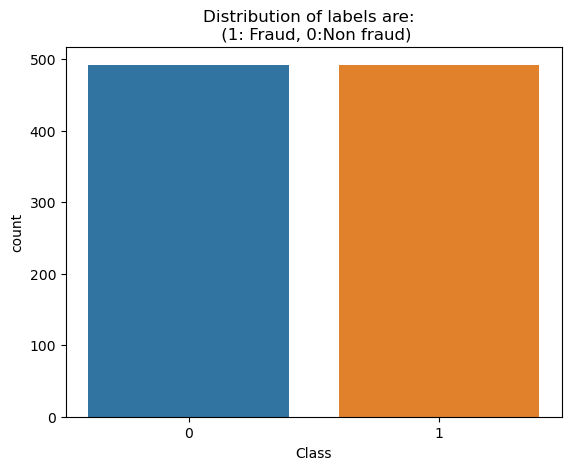

In [85]:
# plot graph

sns.countplot(new_df,x='Class')
plt.title("Distribution of labels are:  \n (1: Fraud, 0:Non fraud)")
plt.plot()